<a href="https://colab.research.google.com/github/Nikhil9989/Leaf-Disease-Detection/blob/master/No_SE_full_disease__final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [0]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256, 256))
image_size = 0
width=256
height=256
depth=3
directory_root = '/content/gdrive/My Drive/raw/PlantVillage-Dataset-master/raw/'

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:250]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Tomato___Septoria_leaf_spot ...
[INFO] Processing Tomato___Target_Spot ...
[INFO] Processing Tomato___Late_blight ...
[INFO] Processing Tomato___Tomato_mosaic_virus ...
[INFO] Processing Tomato___healthy ...
[INFO] Processing Tomato___Spider_mites Two-spotted_spider_mite ...
[INFO] Processing Tomato___Early_blight ...
[INFO] Processing Tomato___Leaf_Mold ...
[INFO] Processing Tomato___Tomato_Yellow_Leaf_Curl_Virus ...
[INFO] Processing Tomato___Bacterial_spot ...
[INFO] Processing Squash___Powdery_mildew ...
[INFO] Processing Strawberry___Leaf_scorch ...
[INFO] Processing Strawberry___healthy ...
[INFO] Processing Apple___Apple_scab ...
[INFO] Processing Apple___Black_rot ...
[INFO] Processing Apple___Cedar_apple_rust ...
[INFO] Processing Apple___healthy ...
[INFO] Processing Blueberry___healthy ...
[INFO] Processing Cherry_(including_sour)___Powdery_mildew ...
[INFO] Processing Cherry_(including_sour)___healthy ...
[INFO] Processing Corn_(m

In [0]:
image_size = len(image_list)
image_size

9402

In [0]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)


print(label_binarizer.classes_)

['Apple___Apple_scab' 'Apple___Black_rot' 'Apple___Cedar_apple_rust'
 'Apple___healthy' 'Blueberry___healthy'
 'Cherry_(including_sour)___Powdery_mildew'
 'Cherry_(including_sour)___healthy'
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot'
 'Corn_(maize)___Common_rust_' 'Corn_(maize)___Northern_Leaf_Blight'
 'Corn_(maize)___healthy' 'Grape___Black_rot'
 'Grape___Esca_(Black_Measles)'
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)' 'Grape___healthy'
 'Orange___Haunglongbing_(Citrus_greening)' 'Peach___Bacterial_spot'
 'Peach___healthy' 'Pepper,_bell___Bacterial_spot'
 'Pepper,_bell___healthy' 'Potato___Early_blight' 'Potato___Late_blight'
 'Potato___healthy' 'Raspberry___healthy' 'Soybean___healthy'
 'Squash___Powdery_mildew' 'Strawberry___Leaf_scorch'
 'Strawberry___healthy' 'Tomato___Bacterial_spot' 'Tomato___Early_blight'
 'Tomato___Late_blight' 'Tomato___Leaf_Mold' 'Tomato___Septoria_leaf_spot'
 'Tomato___Spider_mites Two-spotted_spider_mite' 'Tomato___Target_Spot'
 'Tomato___Tom

In [0]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [0]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [0]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [0]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras import layers
from keras.datasets import mnist
from keras import backend as K

In [0]:
class squeezeExcitation(layers.Layer):
    def squeeze_excite_block(self, input_shape, ratio=16):
        ''' Create a channel-wise squeeze-excite block
        Args:
            input: input tensor
            filters: number of output filters
        Returns: a keras tensor
        References
        -   [Squeeze and Excitation Networks](https://arxiv.org/abs/1709.01507)
        '''
        init = input
        channel_axis = 1 if K.image_data_format() == "channels_first" else -1
        filters = init._keras_shape[channel_axis]
        se_shape = (1, 1, filters)

        se = GlobalAveragePooling2D()(init)
        se = Reshape(se_shape)(se)
        se = Dense(filters // ratio, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
        se = Dense(filters, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)

        if K.image_data_format() == 'channels_first':
            se = Permute((3, 1, 2))(se)

        x = multiply([init, se])
        return x
    
    def spatial_squeeze_excite_block(self, input_shape):
        ''' Create a spatial squeeze-excite block
        Args:
            input: input tensor
        Returns: a keras tensor
        References
        -   [Concurrent Spatial and Channel Squeeze & Excitation in Fully Convolutional Networks](https://arxiv.org/abs/1803.02579)
        '''

        se = Conv2D(1, (1, 1), activation='sigmoid', use_bias=False,
                    kernel_initializer='he_normal')(input)

        x = multiply([input, se])
        return x


    def channel_spatial_squeeze_excite(self, input_shape, ratio=16):
        ''' Create a spatial squeeze-excite block
        Args:
            input: input tensor
            filters: number of output filters
        Returns: a keras tensor
        References
        -   [Squeeze and Excitation Networks](https://arxiv.org/abs/1709.01507)
        -   [Concurrent Spatial and Channel Squeeze & Excitation in Fully Convolutional Networks](https://arxiv.org/abs/1803.02579)
        '''

        cse = squeeze_excite_block(input, ratio)
        sse = spatial_squeeze_excite_block(input)

        x = add([cse, sse])
        return x

In [0]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 256, 256, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 256, 256, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 256, 256, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 85, 85, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 85, 85, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 85, 85, 64)        18496     
_________________________________________________________________
activation_2 (Activation)    (None, 85, 85, 64)       

In [17]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

[INFO] training network...
Epoch 1/25
235/235 [==============================] - 110s 469ms/step - loss: 0.0843 - accuracy: 0.9756 - val_loss: 0.3681 - val_accuracy: 0.9500
Epoch 2/25
235/235 [==============================] - 105s 448ms/step - loss: 0.0627 - accuracy: 0.9797 - val_loss: 0.1562 - val_accuracy: 0.9667
Epoch 3/25
235/235 [==============================] - 105s 448ms/step - loss: 0.0516 - accuracy: 0.9828 - val_loss: 0.1660 - val_accuracy: 0.9683
Epoch 4/25
235/235 [==============================] - 105s 446ms/step - loss: 0.0442 - accuracy: 0.9850 - val_loss: 0.2402 - val_accuracy: 0.9630
Epoch 5/25
235/235 [==============================] - 104s 441ms/step - loss: 0.0393 - accuracy: 0.9865 - val_loss: 0.0650 - val_accuracy: 0.9824
Epoch 6/25
235/235 [==============================] - 104s 441ms/step - loss: 0.0334 - accuracy: 0.9886 - val_loss: 0.0366 - val_accuracy: 0.9881
Epoch 7/25
235/235 [==============================] - 102s 436ms/step - loss: 0.0290 - accuracy: 

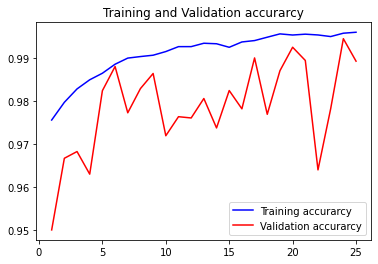

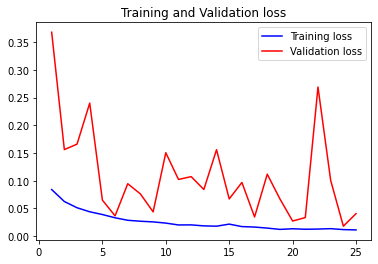

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [24]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
1881/1881 [==============================] - 4s 2ms/step
Test Accuracy: 98.92974495887756


In [27]:
print("[INFO] Saving model...")
pickle.dump(model,open('cnn_model_38_classes_test_NO_SE_250imagesperclass.pkl', 'wb'))

[INFO] Saving model...


In [28]:
import shutil, os
files = "/content/cnn_model_38_classes_test_NO_SE_250imagesperclass.pkl"
shutil.copy(files, '/content/gdrive/My Drive/raw/PlantVillage-Dataset-master/models/')

'/content/gdrive/My Drive/raw/PlantVillage-Dataset-master/models/cnn_model_38_classes_test_NO_SE_250imagesperclass.pkl'

In [29]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
a = model.predict(x_test)
print(a)
from sklearn import metrics
y_pred = a
matrix = metrics.confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print ('Accuracy Score :',accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1)) )
print ('Report : ')
print (classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)) )
# Writing to an excel 
# sheet using Python 
import xlwt 
from xlwt import Workbook 

# Workbook is created 
wb = Workbook() 

# add_sheet is used to create sheet. 
sheet1 = wb.add_sheet('Sheet 1') 


f = open("confusion_matrix.txt", "w")
for i in range(len(matrix)):
    for j in range(len(matrix[i])):
        sheet1.write(i, j, str(matrix[i][j]))
        print(matrix[i][j], end=" ")
        f.write(str(matrix[i][j])+" ")
    print("\n")
    f.write("\n")
wb.save('confusion_matrix.xls') 

[[1.6056534e-08 1.8587107e-09 1.2347832e-10 ... 1.3228631e-10
  1.0450826e-10 4.1198717e-08]
 [3.7327412e-05 2.8223489e-05 7.0031398e-08 ... 2.9670263e-03
  6.3087326e-01 5.8544409e-03]
 [3.2952068e-09 2.3328219e-09 3.7996325e-12 ... 8.6778636e-15
  2.7295059e-12 1.3536347e-10]
 ...
 [5.6946945e-09 5.9698763e-10 1.3048232e-10 ... 7.4207635e-14
  5.5910532e-12 3.5051007e-10]
 [4.6531810e-09 1.9715242e-10 5.4523562e-13 ... 8.4720343e-18
  4.4447770e-15 3.3431580e-13]
 [2.0192440e-06 1.7877799e-02 1.6365386e-09 ... 1.5202284e-09
  3.6704183e-05 2.3310013e-08]]
Accuracy Score : 0.7884104199893673
Report : 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79        40
           1       0.74      0.98      0.84        47
           2       1.00      0.71      0.83        42
           3       0.50      0.95      0.65        57
           4       0.67      1.00      0.80        50
           5       1.00      0.82      0.90        57
           